In [7]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.stats import skewnorm
# from ll_xy import lonlat_to_xy
from scipy.stats import linregress, skew
import datetime
import string
import cartopy
import tools
import cartopy.crs as ccrs
import pandas as pd
from dateutil.relativedelta import relativedelta

all_statistics = tools.get_statistics()

LinregressResult(slope=0.7477750907963777, intercept=0.0038074071697901113, rvalue=0.9999720630998954, pvalue=0.0, stderr=0.00017693710967014355, intercept_stderr=0.00015662942268052194)

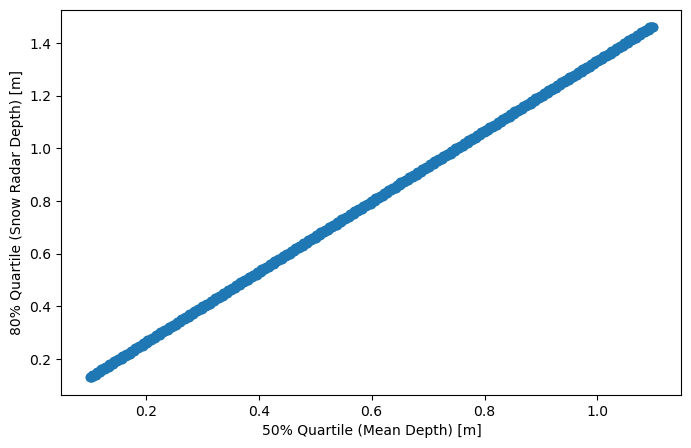

In [68]:
statistics = pickle.load(open('../pickles/statistics.p','rb'))

tiny_bin_edges = np.arange(0,2,0.01)

mean_depths = np.arange(0.1,1.1,0.001)

quan80 = []

for mean_depth in mean_depths:

    bc, ft = tools.depth_distribution_from_depth(mean_depth,tiny_bin_edges,statistics=statistics['all'])
    
    # Calculate Lognormal distribution based on some mean depth

    thresh80arg = np.argmax(np.cumsum(ft)>0.8) #Calculate 80% quantile
    
    thresh80dep = tiny_bin_edges[thresh80arg]
    
    quan80.append( thresh80dep )
    
fig, ax1 = plt.subplots(1,1,figsize=(8,5))    

ax1.scatter(mean_depths,quan80)
ax1.set_xlabel('50% Quartile (Mean Depth) [m]')
ax1.set_ylabel('80% Quartile (Snow Radar Depth) [m]')

lr = linregress(quan80,mean_depths)
lr